In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.set_logical_device_configuration(gpus[0], [tf.config.LogicalDeviceConfiguration(memory_limit=4096)])
        print("complete GPU memory limit setting.")
    except RuntimeError as e:
        print(e)

complete GPU memory limit setting.


In [3]:
BATCH_SIZE = 64
TRAIN_PATH = "cifar/train"
TEST_PATH = "cifar/test"

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(32, 32),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False
)

model = Sequential([
    Conv2D(48, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(96, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(192, (3, 3), activation='relu', padding='same'),
    Conv2D(192, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') 
])
model.summary()

Found 45000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 48)        1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 96)        41568     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 96)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 192)         16

In [6]:
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    verbose=1
)

Epoch 1/50
704/704 [==============================] - 18s 24ms/step - loss: 0.9733 - accuracy: 0.6631 - val_loss: 0.9785 - val_accuracy: 0.6592
Epoch 2/50
704/704 [==============================] - 17s 25ms/step - loss: 0.8851 - accuracy: 0.6923 - val_loss: 0.9194 - val_accuracy: 0.6820
Epoch 3/50
704/704 [==============================] - 17s 24ms/step - loss: 0.8227 - accuracy: 0.7181 - val_loss: 0.9366 - val_accuracy: 0.6826
Epoch 4/50
704/704 [==============================] - 17s 25ms/step - loss: 0.7737 - accuracy: 0.7350 - val_loss: 0.8524 - val_accuracy: 0.7046
Epoch 5/50
704/704 [==============================] - 17s 25ms/step - loss: 0.7258 - accuracy: 0.7501 - val_loss: 0.8412 - val_accuracy: 0.7178
Epoch 6/50
704/704 [==============================] - 17s 25ms/step - loss: 0.6712 - accuracy: 0.7703 - val_loss: 0.9075 - val_accuracy: 0.6948
Epoch 7/50
704/704 [==============================] - 17s 24ms/step - loss: 0.6323 - accuracy: 0.7819 - val_loss: 0.9977 - val_accuracy:

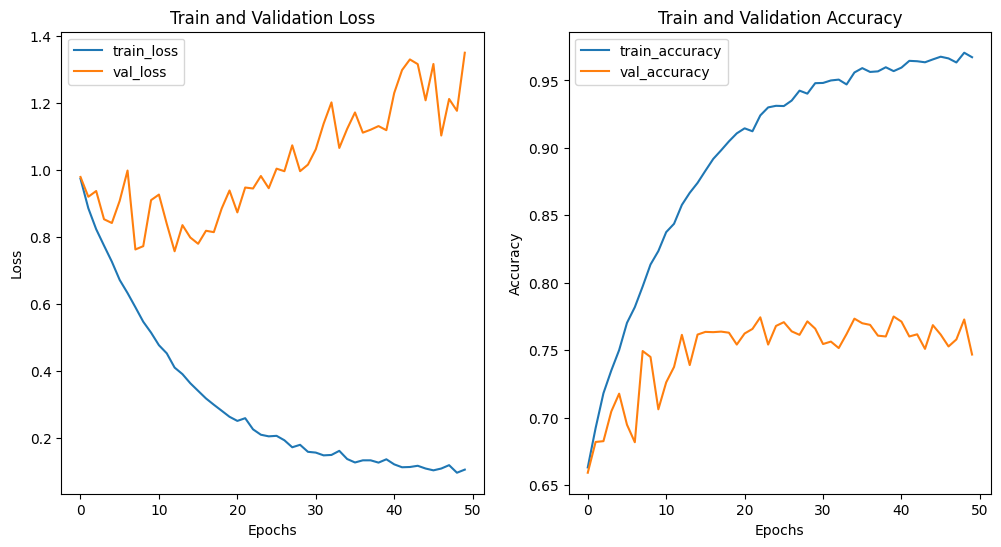

157/157 [==============================] - 4s 23ms/step - loss: 1.3218 - accuracy: 0.7532
Test Accuracy: 0.7532


In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")